# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

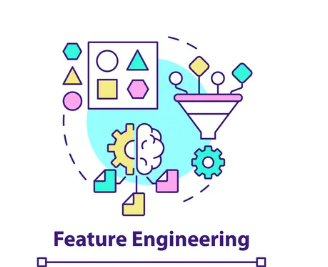

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [3]:
import pandas as pd
df= pd.read_csv('loan_train.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
nu=['int64','float64']
ndf= df.select_dtypes(include=nu)
ndf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [6]:
# Write your solution here
from sklearn.impute import SimpleImputer
imputeC = SimpleImputer(fill_value='constant')
data = imputeC.fit_transform(ndf)
data



array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [7]:
resultdf = pd.DataFrame(data,columns=ndf.columns)
resultdf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


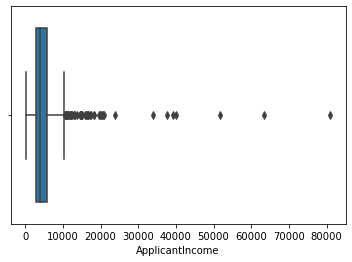

In [8]:
#Write your solution here
import matplotlib.pyplot as plt
import seaborn as sns

adf=ndf['ApplicantIncome']
sns.boxplot(adf)
plt.show()





In [9]:
Q1 = adf.quantile(0.25)
Q3 = adf.quantile(0.75)
IQR = Q3-Q1
upperlimit= Q3+(IQR*1.5)
lowerlimit= Q1-(IQR*1.5)
IQR

2917.5

In [10]:
df1 = adf[(adf > lowerlimit) & (adf < upperlimit)]
df1.shape


(564,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


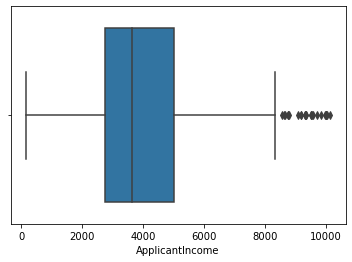

In [11]:
sns.boxplot(df1)
plt.show()

In [12]:
std=ndf['ApplicantIncome']
mean = std.mean()

upperlimit= mean + (3*std)
lowerlimit= mean - (3*std)
df2= std[(std>lowerlimit) & (std<upperlimit)]
df2.shape


(605,)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

In [70]:
# Write your solution here
ndf.head()



ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

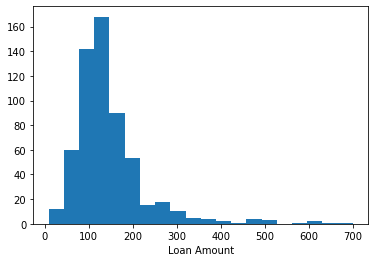

In [77]:
ldf=ndf['LoanAmount']
plt.hist(ldf,bins=20)
plt.xlabel('Loan Amount')
plt.show()

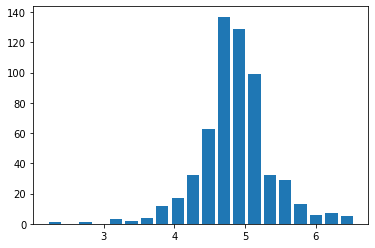

In [78]:
import numpy as np
x = np.log(ldf)
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [83]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
numeric = scaler.fit_transform(ndf)
numeric
resultdf = pd.DataFrame(numeric,columns=ndf.columns)#converting to dataFrame
resultdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.070489           0.000000         NaN           0.74359   
1         0.054830           0.036192    0.172214           0.74359   
2         0.035250           0.000000    0.082489           0.74359   
3         0.030093           0.056592    0.160637           0.74359   
4         0.072356           0.000000    0.191027           0.74359   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
numeric2 = scaler.fit_transform(ndf)
standardf = pd.DataFrame(numeric2,columns=ndf.columns)#converting to dataFrame
standardf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.698029          -0.517358         NaN               0.0   
1         0.264096           0.139079    0.000000               0.0   
2        -0.278492          -0.517358   -0.911765               0.0   
3        -0.421422           0.509087   -0.117647               0.0   
4         0.749786          -0.517358    0.191176               0.0   

   Credit_History  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [86]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
numeric1 = scaler.fit_transform(ndf)
robustdf = pd.DataFrame(numeric1,columns=ndf.columns)#converting to dataFrame
robustdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.698029          -0.517358         NaN               0.0   
1         0.264096           0.139079    0.000000               0.0   
2        -0.278492          -0.517358   -0.911765               0.0   
3        -0.421422           0.509087   -0.117647               0.0   
4         0.749786          -0.517358    0.191176               0.0   

   Credit_History  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [14]:
# Write your solution here
cu=['object','bool']
cdf= df.select_dtypes(include=cu)
cdf


Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 8 columns]

In [16]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(cdf)

rcdf = pd.DataFrame(data,columns=cdf.columns)#converting to dataFrame
rcdf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [24]:
from sklearn.preprocessing import OrdinalEncoder

catcols = ['Gender','Married','Self_Employed']
cdf1= cdf[catcols]
cdf1 = pd.get_dummies(cdf1)
#cdf

oe = OrdinalEncoder()
cdf[['Property_Area','Education']] = oe.fit_transform(cdf[['Property_Area','Education']])
cdf2 = pd.DataFrame(cdf1)
cdf2



Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0                0            1           1            0                 1   
1                0            1           0            1                 1   
2                0            1           0            1                 0   
3                0            1           0            1                 1   
4                0            1           1            0                 1   
..             ...          ...         ...          ...               ...   
609              1            0           1            0                 1   
610              0            1           0            1                 1   
611              0            1           0            1                 1   
612              0            1           0            1                 1   
613              1            0           1            0                 0   

     Self_Employed_Yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
..                 ...  
609                  0  
610                  0  
611                  0  
612                  0  
613                  1  

[614 rows x 6 columns]

In [26]:
cdf = pd.concat([cdf1,cdf2], axis=1)
cdf

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0                0            1           1            0                 1   
1                0            1           0            1                 1   
2                0            1           0            1                 0   
3                0            1           0            1                 1   
4                0            1           1            0                 1   
..             ...          ...         ...          ...               ...   
609              1            0           1            0                 1   
610              0            1           0            1                 1   
611              0            1           0            1                 1   
612              0            1           0            1                 1   
613              1            0           1            0                 0   

     Self_Employed_Yes  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0                    0              0            1           1            0   
1                    0              0            1           0            1   
2                    1              0            1           0            1   
3                    0              0            1           0            1   
4                    0              0            1           1            0   
..                 ...            ...          ...         ...          ...   
609                  0              1            0           1            0   
610                  0              0            1           0            1   
611                  0              0            1           0            1   
612                  0              0            1           0            1   
613                  1              1            0           1            0   

     Self_Employed_No  Self_Employed_Yes  
0                   1                  0  
1                   1                  0  
2                   0                  1  
3                   1                  0  
4                   1                  0  
..                ...                ...  
609                 1                  0  
610                 1                  0  
611                 1                  0  
612                 1                  0  
613                 0                  1  

[614 rows x 12 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [27]:
alldf = pd.concat([cdf, ndf], axis=1)
alldf.head()
alldf.isna().sum()

Gender_Female         0
Gender_Male           0
Married_No            0
Married_Yes           0
Self_Employed_No      0
Self_Employed_Yes     0
Gender_Female         0
Gender_Male           0
Married_No            0
Married_Yes           0
Self_Employed_No      0
Self_Employed_Yes     0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [28]:
#Write your solution here

alldf.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0            1           1            0                 1   
1              0            1           0            1                 1   
2              0            1           0            1                 0   
3              0            1           0            1                 1   
4              0            1           1            0                 1   

   Self_Employed_Yes  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0                  0              0            1           1            0   
1                  0              0            1           0            1   
2                  1              0            1           0            1   
3                  0              0            1           0            1   
4                  0              0            1           1            0   

   Self_Employed_No  Self_Employed_Yes  ApplicantIncome  CoapplicantIncome  \
0                 1                  0             5849                0.0   
1                 1                  0             4583             1508.0   
2                 0                  1             3000                0.0   
3                 1                  0             2583             2358.0   
4                 1                  0             6000                0.0   

   LoanAmount  Loan_Amount_Term  Credit_History  
0         NaN             360.0             1.0  
1       128.0             360.0             1.0  
2        66.0             360.0             1.0  
3       120.0             360.0             1.0  
4       141.0             360.0             1.0

# <center>THANK YOU